In [12]:
pip install -U kaleido

     ---------------------------------------- 65.9/65.9 MB 9.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import datetime as dt

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pio.renderers.default = "svg"

In [2]:
#Load the data

df = pd.read_csv('salaries.csv')

In [3]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## Exploratory Data Analysis

The Unnamed : 0 column serves no purpose, we are going to drop that

In [4]:
df = df.drop('Unnamed: 0', axis = 1)

In [5]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [6]:
# Replace Experience Level and employement type entries from short form to a standard format
df['experience_level'].replace({'EN':'Entry-Level', 'MI':'Mid-Level', 'SE': 'Senior', 'EX': 'Executive Level'}, inplace = True)

df['employment_type'].replace({'PT':'Part-Time', 'FT':'Full-Time', 'CT': 'Contract', 'FL': 'Freelance'}, inplace = True)

In [7]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-Level,Full-Time,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,Senior,Full-Time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,Senior,Full-Time,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,Mid-Level,Full-Time,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,Senior,Full-Time,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [8]:
# Check for null values

df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

We can see we dont have any null values within this dataset 

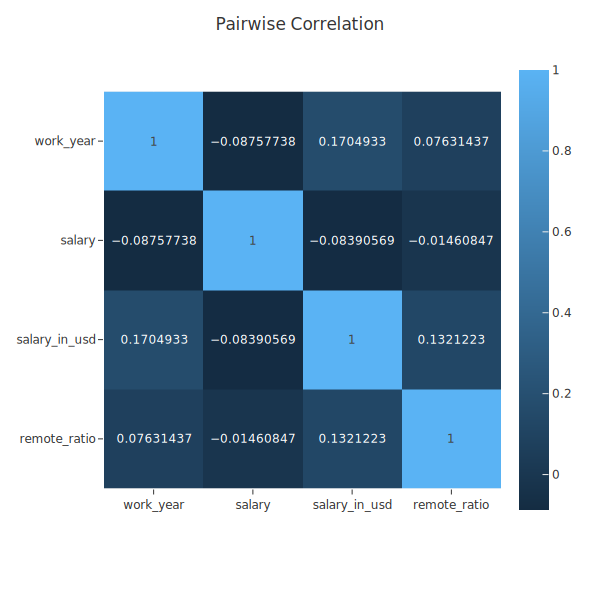

In [9]:
# Starting with correlation
fig = px.imshow(df.corr(), text_auto = True, height = 600, width = 600, template = 'ggplot2')
fig.update_layout(title ="Pairwise Correlation")
fig.show()


In [10]:
# 10 most Popular Roles in Data Science
df['job_title'].value_counts().head(10)

Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Principal Data Scientist        7
Name: job_title, dtype: int64

<AxesSubplot:xlabel='job_title'>

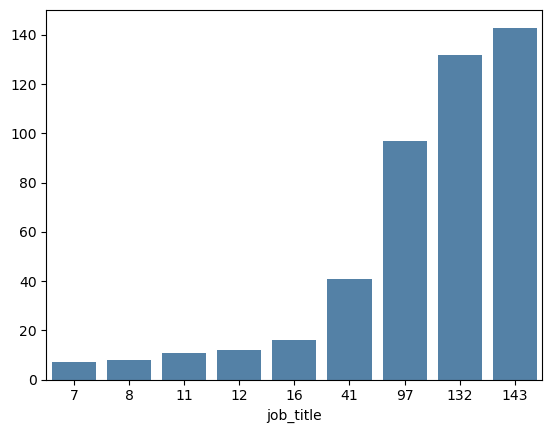

In [11]:
# Plotting 10 most Popular Roles in Data Science in seaborn
Pop = df['job_title'].value_counts().head(10)
sns.barplot(x=Pop.index, y= Pop.values, data = Pop, color= 'steelblue')

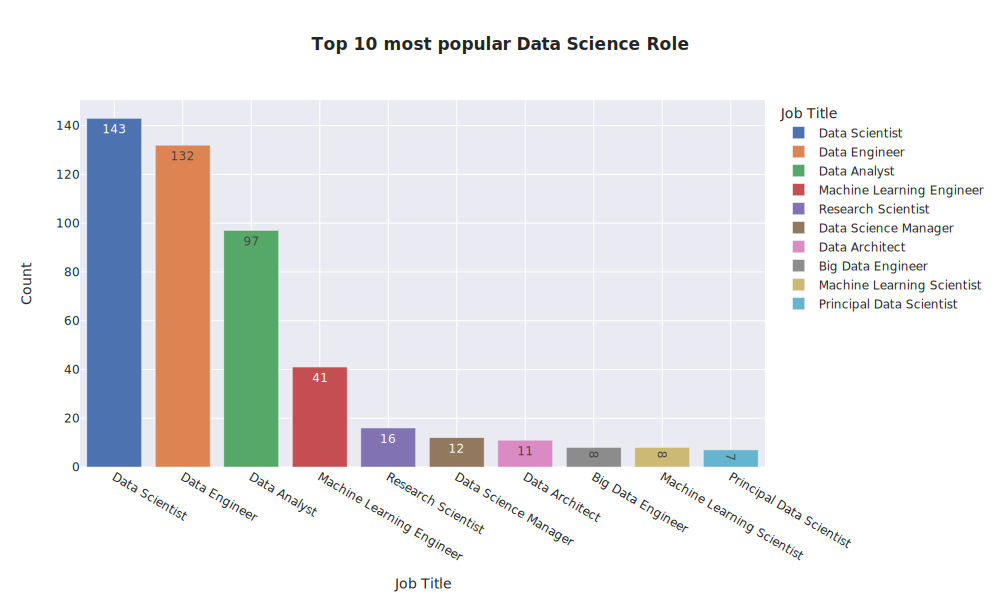

In [20]:
# Plotting 10 most Popular Roles in Data Science in Plotly
fig = px.bar(Pop, x=Pop.index, y=Pop.values, color = Pop.index, text=Pop.values, 
             labels = {'index':'Job Title', 'y':'Count', 'text':'Count'},
            template ='seaborn', title = '<b> Top 10 most popular Data Science Role')
fig.update_layout(autosize=True,width=1000,height=600)
fig.show()

In [21]:
#Display the top 10 profession with Max salaries
Max_Sal = df.groupby('job_title')['salary_in_usd'].max().sort_values(ascending = False).head(10)

In [22]:
Max_Sal 

job_title
Principal Data Engineer               600000
Financial Data Analyst                450000
Research Scientist                    450000
Applied Machine Learning Scientist    423000
Principal Data Scientist              416000
Data Scientist                        412000
Data Analytics Lead                   405000
Applied Data Scientist                380000
Director of Data Science              325000
Data Engineer                         324000
Name: salary_in_usd, dtype: int64

<AxesSubplot:xlabel='salary_in_usd'>

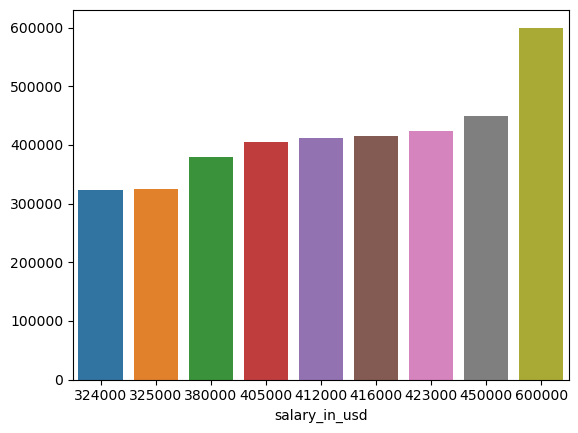

In [23]:
sns.barplot(x = Max_Sal.index , y = Max_Sal.values, data = Max_Sal)

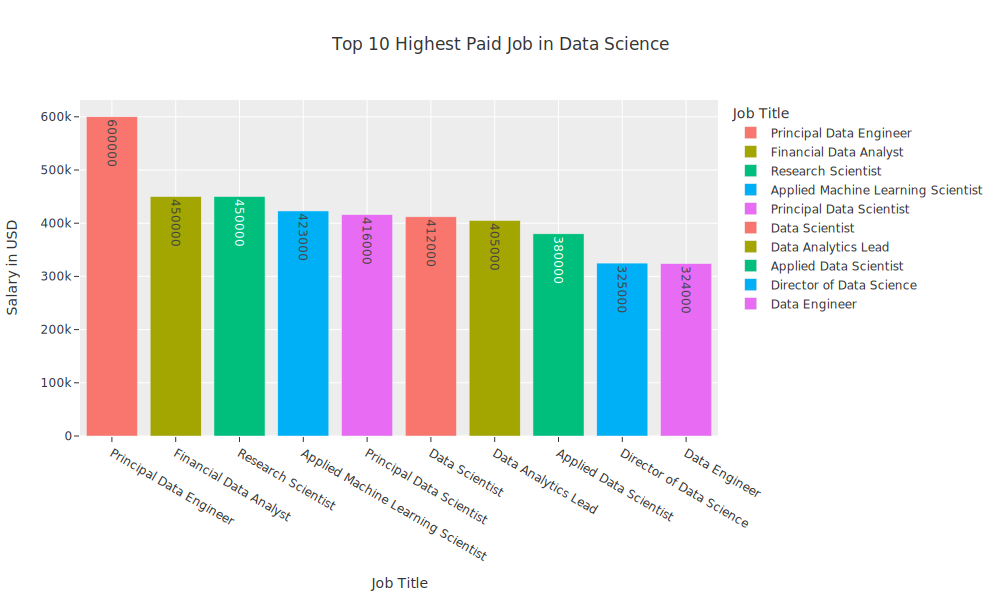

In [24]:
# Plotting with Plotly

fig = px.bar(Max_Sal,x = Max_Sal.index , y = Max_Sal.values, 
             color = Max_Sal.index, labels = {'job_title' : 'Job Title' , 'y': 'Salary in USD'},
            template ='ggplot2', text='salary_in_usd', title='Top 10 Highest Paid Job in Data Science')
fig.update_layout(autosize=True,width=1000,height=600)
fig.show()

In [25]:
# Taking a look at top roles with highest average pay
df.groupby('job_title', as_index=False)['salary_in_usd'].mean().sort_values(by = 'salary_in_usd', ascending = False).head(10)
                                                                    

,job_title,salary_in_usd
14,Data Analytics Lead,405000.000000
45,Principal Data Engineer,328333.333333
28,Financial Data Analyst,275000.000000
46,Principal Data Scientist,215242.428571
25,Director of Data Science,195074.000000
16,Data Architect,177873.909091
3,Applied Data Scientist,175655.000000
2,Analytics Engineer,175000.000000
23,Data Specialist,165000.000000
29,Head of Data,160162.600000


In [26]:
Mean_Sal = df.groupby('job_title', as_index=False)['salary_in_usd'].mean().sort_values(by = 'salary_in_usd', ascending = False).head(10)


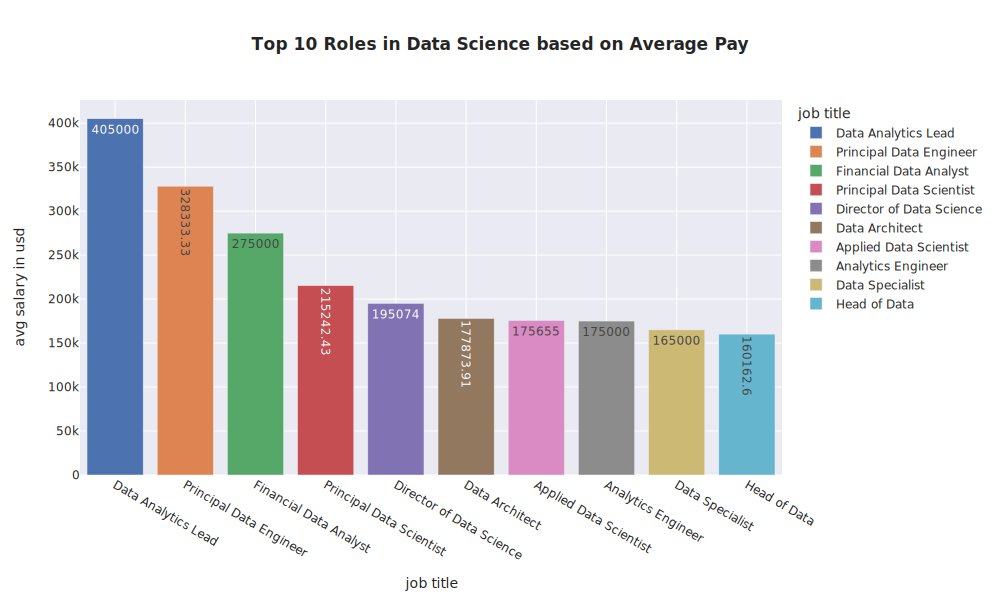

In [27]:
Mean_Sal['salary_in_usd'] = round(Mean_Sal['salary_in_usd'] , 2)
fig = px.bar(Mean_Sal, x = 'job_title' , y = 'salary_in_usd', color = 'job_title', 
             labels = {'job_title': 'job title' , 'salary_in_usd' :'avg salary in usd'},
            text = 'salary_in_usd', template = 'seaborn' , title = '<b>Top 10 Roles in Data Science based on Average Pay')
fig.update_layout(autosize=True,width=1000,height=600)
fig.show()

In [28]:
# Taking a look at jobs based on Experience Level
df.groupby('experience_level', as_index = False)['salary_in_usd'].count().sort_values(by='salary_in_usd', ascending =False)

,experience_level,salary_in_usd
3,Senior,280
2,Mid-Level,213
0,Entry-Level,88
1,Executive Level,26


In [29]:
Exp_Lvl = df.groupby('experience_level', as_index = False)['salary_in_usd'].count().sort_values(by='salary_in_usd', ascending =False)

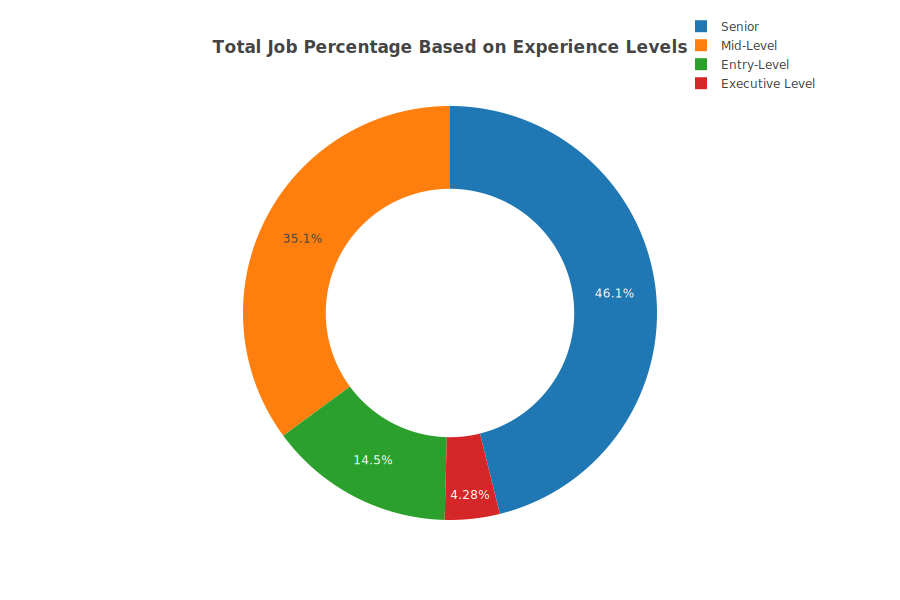

In [33]:
fig = px.pie(Exp_Lvl, names = 'experience_level', values = 'salary_in_usd', color ='experience_level', hole = 0.6,
            labels ={'experience_level':'Experience Level','salary_in_usd':'Salary'}, template = 'gridon',
            title = '<b> Total Job Percentage Based on Experience Levels')
fig.update_layout(title_x = 0.5, legend = dict(orientation = 'v' , yanchor = 'bottom' , y = 1.02 , xanchor = 'right' , x = 1))
fig.update_layout(autosize=True,width=900,height=600)
fig.show()

In [34]:
# Taking a look at Data Science jobs at Employment Type Level
Exp_Typ = df.groupby('employment_type', as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd', ascending =False)

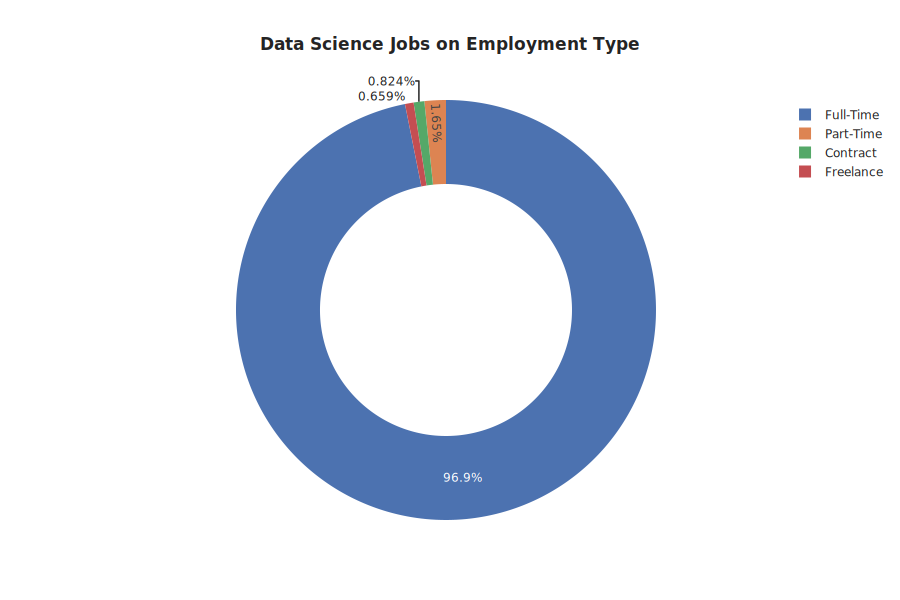

In [36]:
fig = px.pie(Exp_Typ, names ='employment_type', values='salary_in_usd', color='employment_type', hole=0.6,
            labels={'employment_type':'Employment Type', 'salary_in_usd':'Salary'}, template='seaborn',
            title = '<b> Data Science Jobs on Employment Type')
fig.update_layout(autosize=True,width=900,height=600)
fig.show()

In [37]:
# Looking into the ratio of how remote work is possible
df.groupby('remote_ratio', as_index= False)['salary_in_usd'].count().sort_values(by='remote_ratio') 

,remote_ratio,salary_in_usd
0,0,127
1,50,99
2,100,381


In [38]:
Rem_Wrk = df.groupby('remote_ratio', as_index= False)['salary_in_usd'].count().sort_values(by='remote_ratio') 

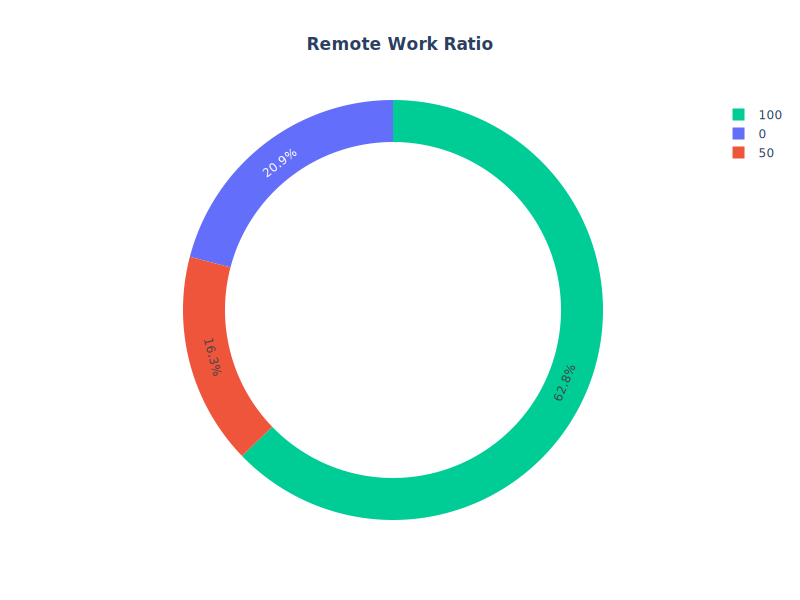

In [40]:
fig = px.pie(Rem_Wrk, names='remote_ratio', values='salary_in_usd', color='remote_ratio', hole=0.8,
            labels ={'remote_ratio':'Remote Ratio', 'salary_in_usd':'Salary'}, template='plotly',
            title='<b> Remote Work Ratio')
fig.update_layout(title_x=0.5)
fig.update_layout(autosize=True,width=800,height=600)
fig.show()

In [41]:
# Taking look at company sizes
df.groupby('company_size', as_index=False)['salary_in_usd'].count().sort_values(by='company_size', ascending =False)

,company_size,salary_in_usd
2,S,83
1,M,326
0,L,198


In [42]:
Comp_Size =df.groupby('company_size', as_index=False)['salary_in_usd'].count().sort_values(by='company_size', ascending =False) 

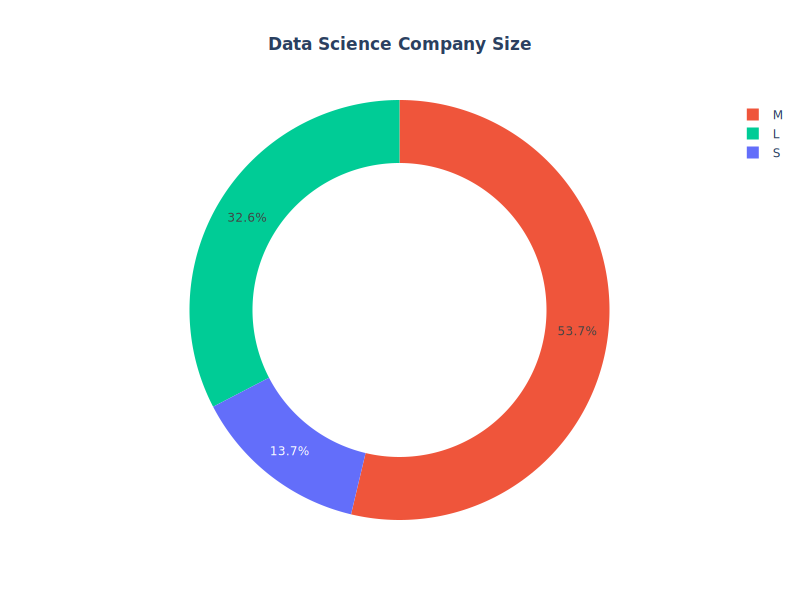

In [44]:
fig= px.pie(Comp_Size, names='company_size', values='salary_in_usd', color = 'company_size', hole=0.7,
           labels={'company_size':'Company Size', 'salary_in_usd': 'Salary'}, template='plotly',
           title='<b> Data Science Company Size')
fig.update_layout(title_x=0.5)
fig.update_layout(autosize=True,width=800,height=600)
fig.show()

In [45]:
# Taking a look at top 15 countries with Maximum Data Science Jobs
df.groupby('company_location', as_index=False)['employment_type'].count().sort_values(
    by='employment_type', ascending=False).head(15)

,company_location,employment_type
48,US,355
18,GB,47
6,CA,30
12,DE,28
25,IN,24
17,FR,15
16,ES,14
19,GR,11
29,JP,6
40,PL,4


In [46]:
Com_Emp = df.groupby('company_location', as_index=False)['employment_type'].count().sort_values(
    by='employment_type', ascending=False).head(15)

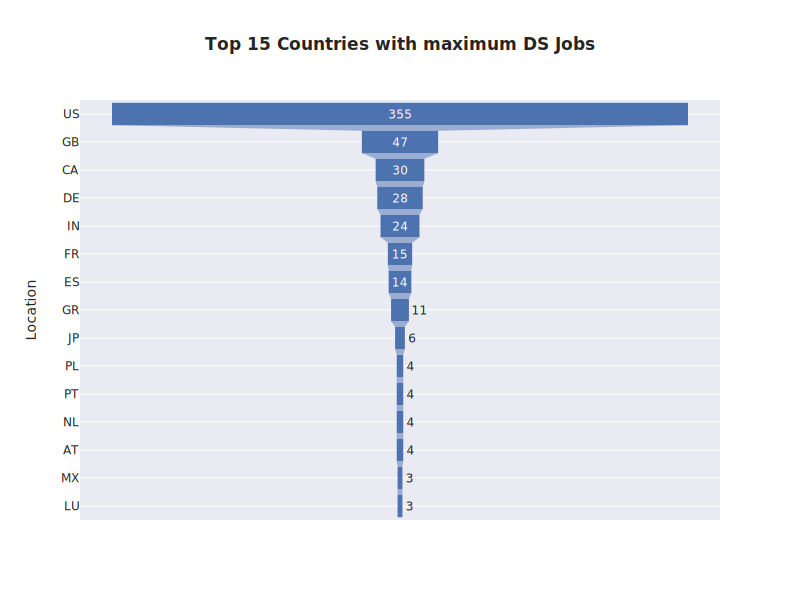

In [48]:
fig = px.funnel(Com_Emp, x='employment_type', y='company_location', template='seaborn',
               labels={'employment_type':'Employment Type', 'company_location':'Location'},
               title='<b> Top 15 Countries with maximum DS Jobs')
fig.update_layout(autosize=True,width=800,height=600)
fig.show()

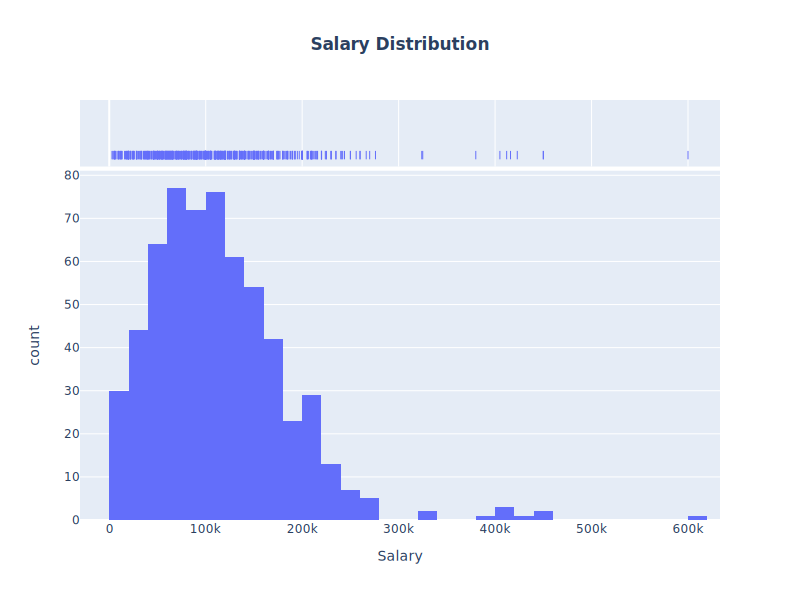

In [50]:
# Salary Distribution
fig = px.histogram(df, x='salary_in_usd', marginal='rug', 
                  labels={'salary_in_usd':'Salary'}, title='<b> Salary Distribution')
fig.update_layout(title_x=0.5)
fig.update_layout(autosize=True,width=800,height=600)
fig.show()

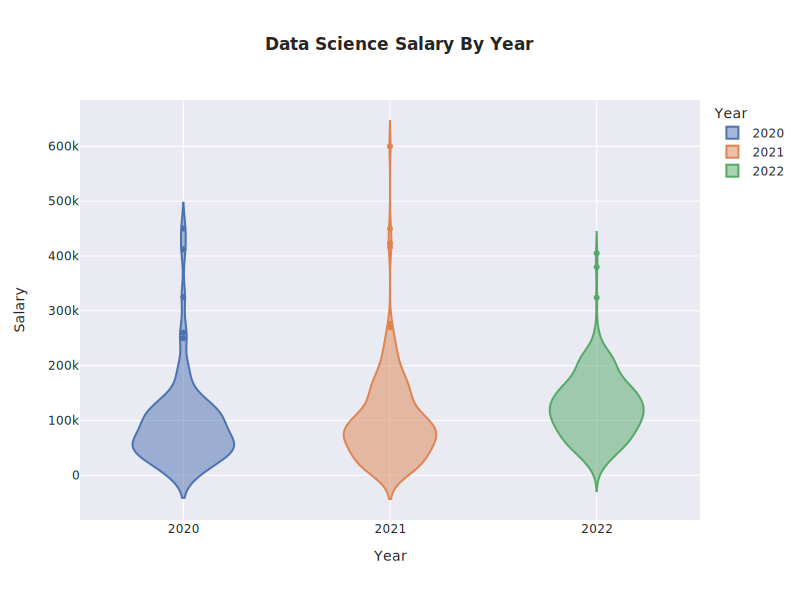

In [52]:
# Looking at DS job salary over the years
fig = px.violin(df, x='work_year', y='salary_in_usd', color='work_year', template='seaborn',
               labels={'work_year': 'Year', 'salary_in_usd':'Salary'}, 
               title='<b> Data Science Salary By Year')
fig.update_layout(autosize=True,width=800,height=600)
fig.show()

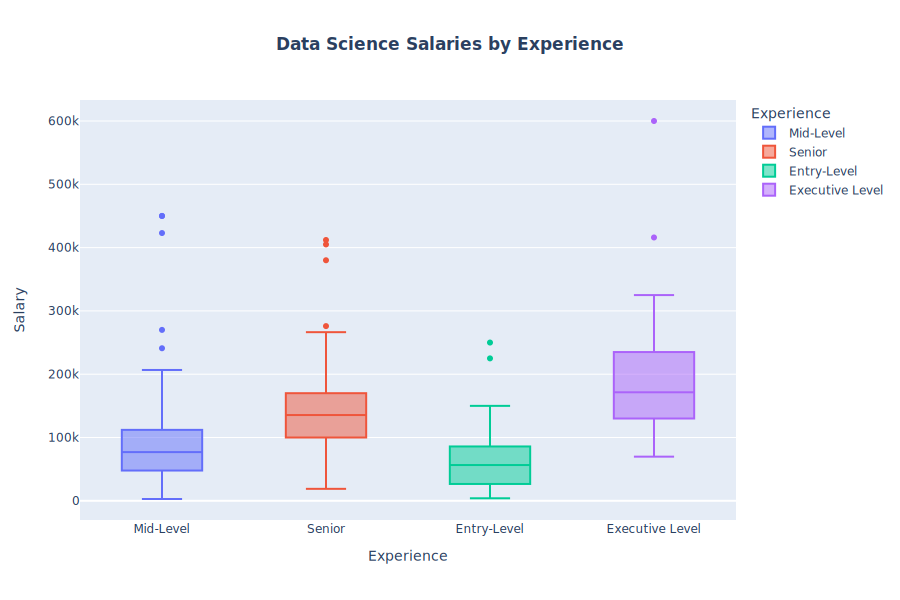

In [55]:
# Displaying the data science salaries based on Experience
fig = px.box(df, x='experience_level', y='salary_in_usd', color='experience_level',
            labels={'experience_level':'Experience', 'salary_in_usd':'Salary'},
            title='<b> Data Science Salaries by Experience')
fig.update_layout(title_x=0.5)
fig.update_layout(autosize=True,width=900,height=600)
fig.show()

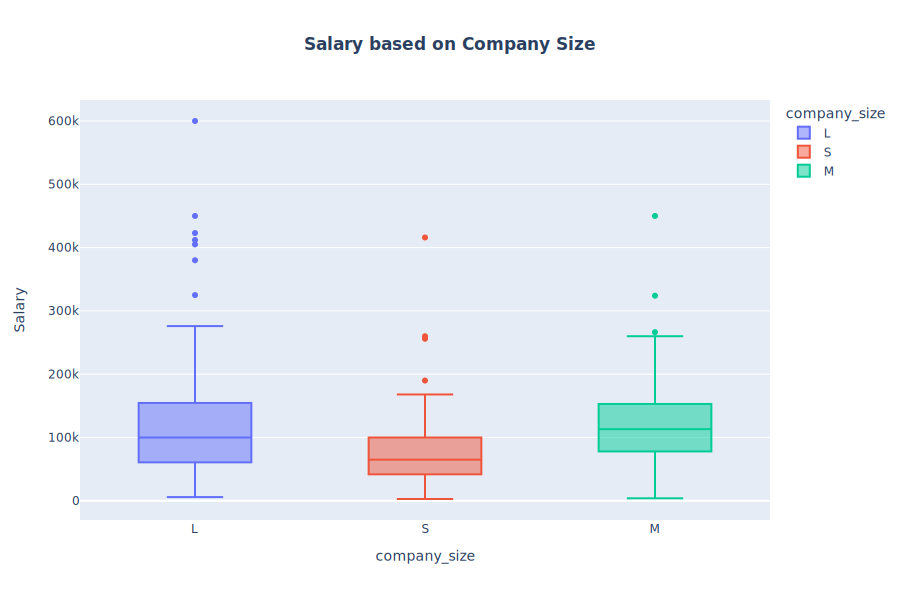

In [56]:
# Taking a look at Data Science Salaries based on Company size
fig = px.box(df, x='company_size', y='salary_in_usd', color='company_size',
            labels={'company_sixe':'Company Size', 'salary_in_usd':'Salary'},
            title='<b> Salary based on Company Size')
fig.update_layout(title_x=0.5)
fig.update_layout(autosize=True,width=900,height=600)
\
fig.show()

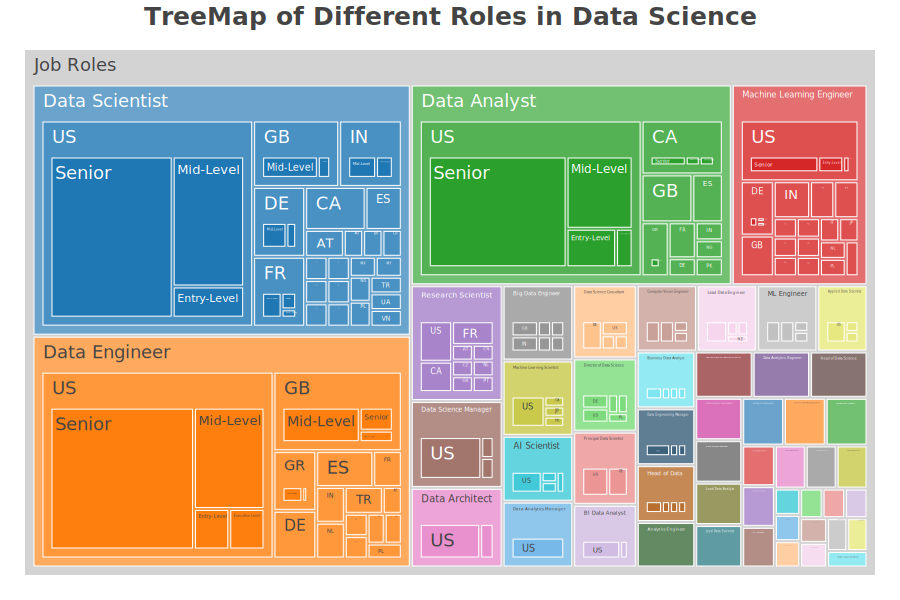

In [58]:
# Creating a Treemap of Different DS Roles
fig = px.treemap(df, path=[px.Constant('Job Roles'), 'job_title', 'company_location', 'experience_level'],
                template='presentation', hover_name='job_title', 
                 title='<b> TreeMap of Different Roles in Data Science')
fig.update_traces(root_color='lightgrey')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.update_layout(autosize=True,width=900,height=600)
fig.show()